### 1.Using Yelp reviews data set (https://bit.ly/2U7mLmC), do the following analysis
        a.Clean the dataset
        b.Create Document Term Matrix
        c.Using Multinomial Naïve Bayes, create a supervised model to predict the sentiment and report accuracy
        d.Using Adaboost and Random Forest to create a supervised model to predict the sentiment and report 
        e.Using Google’s word2vec, classify the sentiment. Build a Adaboost model and report accuracy along with ROC curves               (comparing results from above models)
        f.Identify sentiment using vader package and compare the results


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GAYATHRI.GAYATHRI\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GAYATHRI.GAYATHRI\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\GAYATHRI.GAYATHRI\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [5]:
yelp_reviews = pd.read_csv('D:/Gayathri P/Term 3/Unstuctured/Assignment_2/yelp_labelled.csv', sep='\t',header=None)
yelp_reviews.head() # 0:Negative, 1:Positive

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
yelp_reviews.columns = ['Reviews','Sentiment']
yelp_reviews.head()

,Reviews,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


#### a.Clean the dataset

In [10]:
# Data Cleaning

stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

docs = yelp_reviews['Reviews'].str.lower().str.replace('[^a-z ]', '')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: Reviews, dtype: object

#### b.Create Document Term Matrix

In [11]:
# Creating Document Term Matrix Using CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)

df_dtm = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())
df_dtm.head(2)

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,yelper,yet,youd,youll,your,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### c.Using Multinomial Naïve Bayes, create a supervised model to predict the sentiment and report accuracy

In [13]:
# Splitting data into Train & Test

train_x, test_x = train_test_split(df_dtm, test_size = 0.2, random_state = 100)
train_y = yelp_reviews.iloc[train_x.index]['Sentiment']
test_y = yelp_reviews.iloc[test_x.index]['Sentiment']

In [24]:
model1 = MultinomialNB()
model1.fit(train_x,train_y)
MNB_predict_class = model1.predict(test_x)
accuracy_score(test_y,MNB_predict_class)

0.765

#### d.Using Adaboost and Random Forest to create a supervised model to predict the sentiment and report 

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [16]:
# Text Classification and calculating accuracy

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state = 100, n_estimators=300)
rf_model.fit(train_x,train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y,rf_predict_class)

0.775

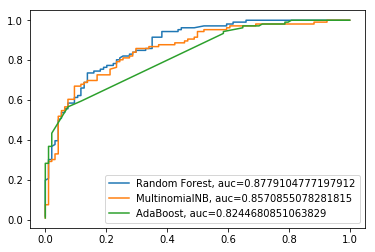

In [41]:
from sklearn import metrics
y_pred_proba_rf = rf_model.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred_proba_rf)
auc_rf = metrics.roc_auc_score(test_y, y_pred_proba_rf)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc_rf))

y_pred_proba_MNB = model1.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred_proba_MNB)
auc_NB = metrics.roc_auc_score(test_y, y_pred_proba_MNB)
plt.plot(fpr,tpr,label="MultinomialNB, auc="+str(auc_NB))

model_Ada = AdaBoostClassifier(random_state=100)
model_Ada.fit(train_x,train_y)

y_pred_proba_Ada= model_Ada.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y, y_pred_proba_Ada)
auc_Ada = metrics.roc_auc_score(test_y, y_pred_proba_Ada)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc_Ada))


plt.legend(loc=4)
plt.show()

#### e.Using Google’s word2vec, classify the sentiment. Build a Adaboost model and report accuracy along with ROC curves(comparing results from above models)

In [ ]:
url = "../input/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
embeddings = gensim.models.KeyedVectors.load_word2vec_format(url, binary=True)

In [46]:
docs_vectors = pd.DataFrame()
for doc in yelp_reviews['Reviews'].str.lower().str.replace('[^a-z ]', ''):
    temp = pd.DataFrame()
    for word in nltk.word_tokenize(doc):
        try:
            word_vec = embeddings[word]
            temp = temp.append(pd.Series(word_vec),ignore_index=True)
        except:
            pass
    doc_vector = temp.mean()   # Column mean of each doc
    docs_vectors = docs_vectors.append(doc_vector, ignore_index=True)


### Text_classification using word2vec kaggle link

[Classifying Sentiment Using Google’s word2vec](https://www.kaggle.com/gayathrireddy/text-classification-word2vec)

#### f.Identify sentiment using vader package and compare the results

In [19]:
def get_sentiment(doc): # doc: cleaned data
    sentiment = SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(doc)['compound']
    if compound > 0:
        return 1
    else:
        return 0
sent_pred = yelp_reviews['Reviews'].apply(get_sentiment)
print(accuracy_score(yelp_reviews['Sentiment'],sent_pred))

0.812


### 2.	Apply topic modelling to understand the topics discussed in the reviews. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [1]:
import gensim

In [7]:
docs_clean =[]
docs = yelp_reviews['Reviews'].fillna(' ').str.lower().str.replace('[^a-z ]','')
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['', 'use', 'good', 'like', 'great','this','wa','thi'])
stemmer = nltk.stem.PorterStemmer()
for doc in docs:
    words = doc.split(' ')
    words_clean = [stemmer.stem(word) for word in words if stemmer.stem(word) not in stopwords]
    docs_clean.append(words_clean)
len(docs_clean)

1000

In [8]:
dictionary  = gensim.corpora.Dictionary(docs_clean)
dictionary

In [9]:
# structure to pass to LDA model
docs_bow = []
for doc in docs_clean:
    doc_bow = dictionary.doc2bow(doc)
    docs_bow.append(doc_bow)

In [10]:
lda_model = gensim.models.LdaModel(docs_bow, id2word=dictionary, num_topics=4)

In [76]:
lda_model.get_document_topics(docs_bow[0]) # Give probability of different topics

[(0, 0.8431575), (1, 0.15684253)]

In [11]:
lda_model.print_topics()  # help to name the topic

[(0,
  '0.025*"place" + 0.022*"veri" + 0.020*"time" + 0.018*"food" + 0.018*"servic" + 0.015*"back" + 0.008*"go" + 0.006*"came" + 0.006*"amaz" + 0.006*"one"'),
 (1,
  '0.013*"servic" + 0.010*"place" + 0.008*"food" + 0.008*"star" + 0.007*"disappoint" + 0.007*"also" + 0.007*"veri" + 0.007*"burger" + 0.006*"go" + 0.006*"staff"'),
 (2,
  '0.014*"food" + 0.011*"back" + 0.011*"go" + 0.010*"dont" + 0.010*"order" + 0.008*"veri" + 0.008*"pizza" + 0.007*"servic" + 0.007*"think" + 0.007*"wait"'),
 (3,
  '0.030*"food" + 0.023*"place" + 0.010*"servic" + 0.010*"go" + 0.009*"realli" + 0.008*"onli" + 0.007*"love" + 0.007*"get" + 0.007*"eat" + 0.007*"restaur"')]

In [12]:
topics = []
for doc_bow in docs_bow:
    doc2topic_prob=lda_model.get_document_topics(doc_bow)
    doc2topic_prob= pd.DataFrame(doc2topic_prob,columns = ['topic','prob'])
    topic = doc2topic_prob.sort_values('prob',ascending=False).iloc[0]['topic']
    topics.append(topic)
    


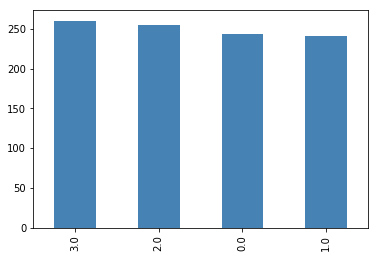

In [13]:
yelp_reviews['topics']=topics
yelp_reviews['topics'].value_counts().plot.bar(color='steelblue')
# yelp_reviews['topics'].head()